# **INSTALLATION OF PACKAGES AND LIBRARIES**

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00


# **IMPORTING THE PACKAGES IN OUR ENVIRONMENT**

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **UPLOADING THE IMAGES ONLY ONE AT A TIME**

In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded:",file_name)

Saving Screenshot 2025-09-14 225619.png to Screenshot 2025-09-14 225619.png
Uploaded: Screenshot 2025-09-14 225619.png


# **CALLING YOLO MODEL**

In [ ]:
model= YOLO("yolov5n.pt")

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



# **GIVING YOLO MODEL THE IMAGE**

In [ ]:
results= model(file_name)
annotated = results[0].plot()


image 1/1 /content/Screenshot 2025-09-14 225619.png: 288x640 3 persons, 84.5ms
Speed: 13.6ms preprocess, 84.5ms inference, 421.6ms postprocess per image at shape (1, 3, 288, 640)


# **FIXING THE SIZE, COLOR AND REMOVING THE AXIS**

(np.float64(-0.5), np.float64(1671.5), np.float64(708.5), np.float64(-0.5))

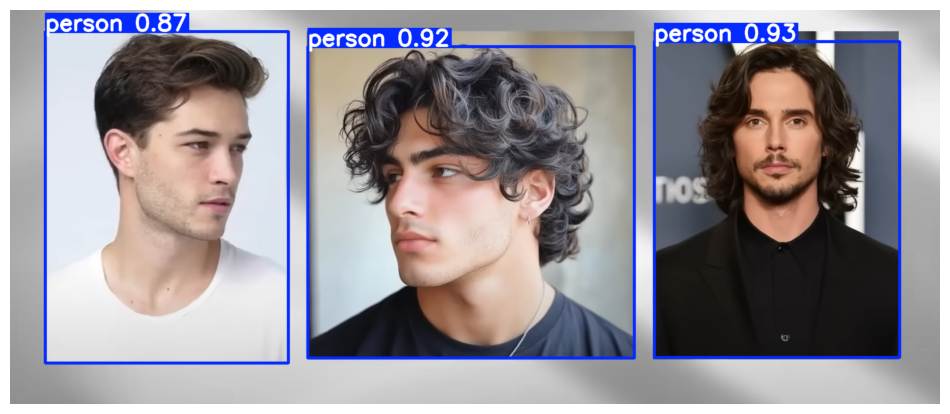

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

# **UPLOADING THE VIDEO FORMAT FILE**

In [ ]:
uploaded= files.upload()
video_path= list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving 4188423-uhd_3840_2160_24fps.mp4 to 4188423-uhd_3840_2160_24fps.mp4
Uploaded: 4188423-uhd_3840_2160_24fps.mp4


# **RESIZING THE VIDEO FORMAT AND READING THE EVERY FRAME**

In [ ]:
output_path = "output_detected.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps= cap.get(cv2.CAP_PROP_FPS)or 25.0
fourcc= cv2.VideoWriter_fourcc(*'mp4v')
out= cv2.VideoWriter(output_path, fourcc, fps, (width,height))

frame_count =0
while True:
  ret, frame = cap.read()
  if not ret:
    break
  result= model(frame)
  annotated = results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count %100 == 0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:", output_path)
files.download(output_path)


0: 384x640 2 horses, 2 cows, 52.1ms
Speed: 3.4ms preprocess, 52.1ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 10.1ms
Speed: 3.2ms preprocess, 10.1ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 10.0ms
Speed: 3.4ms preprocess, 10.0ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 10.0ms
Speed: 3.1ms preprocess, 10.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 9.4ms
Speed: 3.4ms preprocess, 9.4ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 6.9ms
Speed: 3.0ms preprocess, 6.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 horses, 2 cows, 9.1ms
Speed: 2.9ms preprocess, 9.1ms i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **DETECTING THE OBJECTS IN LIVE WEB CAM**

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 2 persons, 1 scissors, 73.1ms
Speed: 7.1ms preprocess, 73.1ms inference, 331.7ms postprocess per image at shape (1, 3, 480, 640)


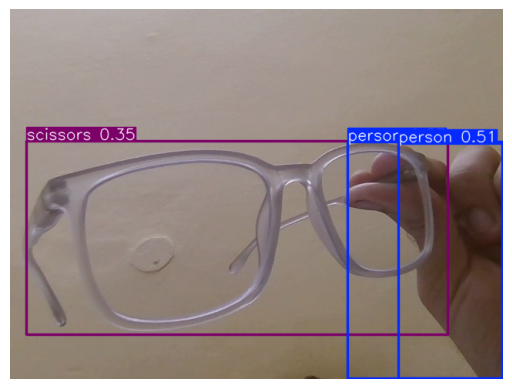

In [2]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model= YOLO("yolov8n.pt")

def take_photo(filename='snapshot.jpg'):
    js = """
   async function takePhoto() {
     const div = document.createElement('div');
     const capture = document.createElement('button');
     capture.textContent = 'Capture';
     div.appendChild(capture);
     document.body.appendChild(div);


     const video = document.createElement('video');
     video.style.display = 'block';
     const stream = await navigator.mediaDevices.getUserMedia({video: true});
     document.body.appendChild(video);
     video.srcObject = stream;
     await video.play();


     // Resize window
     google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


     // Wait for Capture button
     await new Promise((resolve) => capture.onclick = resolve);


     const canvas = document.createElement('canvas');
     canvas.width = video.videoWidth;
     canvas.height = video.videoHeight;
     canvas.getContext('2d').drawImage(video, 0, 0);
     stream.getTracks().forEach(track => track.stop());
     const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
     div.remove();
     return imgData;
   }
   takePhoto();
   """
    data = output.eval_js(js)
    with open(filename,'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:",filename)

results=model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()